In [1]:
%matplotlib widget
from scipy import constants
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
iterations = 1
deltaR = 1

@interact(radius=widgets.FloatLogSlider(description="Max Radius", value=1e-9, base=10, min=-12, max=-8), radiusStep=widgets.FloatLogSlider(description=r'$\Delta$r', value=1e-12, base=10, min=-15, max=-10))
def setIterations(radius, radiusStep):
    global iterations
    global deltaR
    deltaR = radiusStep
    iterations = int(radius/radiusStep)
    print("hi")

interactive(children=(FloatLogSlider(value=1e-09, description='Max Radius', max=-8.0, min=-12.0), FloatLogSlid…

interactive(children=(FloatText(value=14.0873343763323, description='Energy / eV'), IntSlider(value=1, descrip…

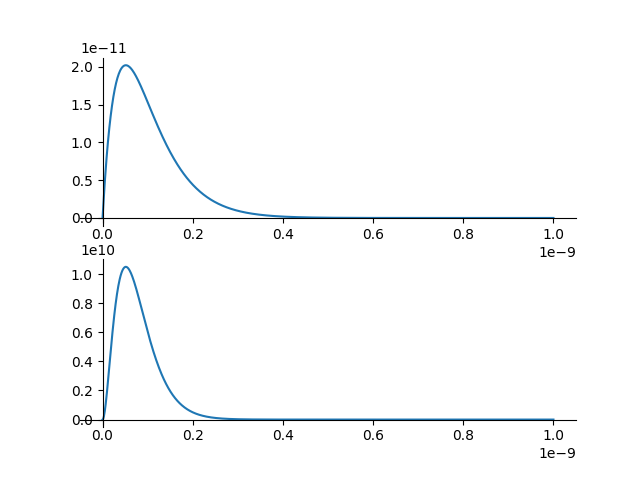

In [3]:
_, axs = plt.subplots(2)
    
def showPlot():
    
    for ax in axs:
    
        ax.clear()
        ax.spines['left'].set_position('zero')

        # turn off the right spine/ticks
        ax.spines['right'].set_color('none')
        ax.yaxis.tick_left()

        # set the y-spine
        ax.spines['bottom'].set_position('zero')

        # turn off the top spine/ticks
        ax.spines['top'].set_color('none')
        ax.xaxis.tick_bottom()
    
    axs[0].plot(np.array(psi)[:,0], np.array(psi)[:,1])
    
    squared = np.square(np.array(psi)[:,1])
    squareSum = np.sum(squared) * deltaR
    prob = squared / squareSum
    print(np.sum(prob) * deltaR)
    axs[1].plot(np.array(psi)[:,0], prob)

almostZero = 10e-15

psi2 = [[almostZero, 0]]
psi1 = [[almostZero, 1]]
psi = [[almostZero, 0]]

def clearData():
    global psi2
    psi2 = [[almostZero, 0]]
    global psi1
    psi1 = [[almostZero, 1]]
    global psi
    psi = [[almostZero, 0]]

def Wpot(r):
    return - constants.e**2 / (4 * constants.pi * constants.epsilon_0 * r)

energyInput = widgets.FloatText(description="Energy / eV", min=0, max=20, value=14.0873343763323)
nSlider = widgets.IntSlider(min=1, max=10)

@interact(weV = energyInput, n = nSlider)
def calculateSchrödi(weV, n):
    w = -(weV) * constants.e * 1/(n**2)
    print("n=1: 14,0873343763323\nn=2: 13.8408111111111")
    
    clearData()
    
    for i in range(1, iterations + 1):
        r = almostZero + i * deltaR
        
        #psi
        newPsi = psi1[i-1][1] * deltaR + psi[i-1][1]
        psi.append([r, newPsi])
        
        #psi1
        newPsi1 = psi2[i-1][1] * deltaR + psi1[i-1][1]
        psi1.append([r, newPsi1])
        
        #psi2        
        newPsi2 = -(8 * (constants.pi**2) * constants.m_e) / (constants.h**2) * (w - Wpot(r)) * psi[i][1]
        psi2.append([r, newPsi2])
        
    showPlot()
    

In [4]:
def calculatePsiRmax(rMax, weV, n):
    w = -(weV) * constants.e * (1/n**2)
    
    oldPsi = 0
    
    oldPsi1 = 1
    
    oldPsi2 = 0
    
    for i in range(1, int(rMax/deltaR)):
        r = almostZero + i * deltaR
        
        #psi
        newPsi = oldPsi1 * deltaR + oldPsi
        
        
        #psi1
        newPsi1 = oldPsi2 * deltaR + oldPsi1
        
        #psi2        
        newPsi2 = -(8 * (constants.pi**2) * constants.m_e) / (constants.h**2) * (w - Wpot(r)) * newPsi
        
        oldPsi = newPsi
        oldPsi1 = newPsi1
        oldPsi2 = newPsi2
        
    return oldPsi

def calculateW(_):
    lower = wRangeSlider.value[0]
    upper = wRangeSlider.value[1]
    newR = lower
    
    lowerValue = calculatePsiRmax(radiusCutoff.value, lower, nSlider.value)
    upperValue = calculatePsiRmax(radiusCutoff.value, upper, nSlider.value)
    
    for i in range(0, int(iterationSlider.value)):
        
        lowerSign = -1 if lowerValue < 0 else 1
        upperSign = -1 if upperValue < 0 else 1
        
        signChange = not lowerSign == upperSign
        
        if not signChange:
            print("no sign change:" + str(lowerValue) + ", " + str(upperValue))
            return
    
        newR = lower + (upper - lower) * 0.5#abs(lowerValue/upperValue)
        newValue = calculatePsiRmax(radiusCutoff.value, newR, nSlider.value)
        
        newSign = newValue / abs(newValue)
        
        if newSign == lowerValue/abs(lowerValue):
            lower = newR
            lowerValue = newValue
        else:
            upper = newR
            upperValue = newValue
    
    energyInput.value = newR
    print("Last value @r=" + str(radiusCutoff.value) + ": " + str(newValue))
    return
    
iterationSlider = widgets.FloatLogSlider(description = "Iterations", base=10, value = 1000, min=0, max = 6)
    
wRangeSlider = widgets.FloatRangeSlider(description="Range to calculate W in", value=[10, 16], min=0, max=30)
    
buttonCalculateW = widgets.Button(description="Calculate best W")
buttonCalculateW.on_click(calculateW)

radiusCutoff = widgets.FloatLogSlider(description="r where psi(r)=0", value=1e-9, base=10, min=-12, max=-8)

display(buttonCalculateW)
display(iterationSlider)
display(wRangeSlider)
display(radiusCutoff)
display(nSlider)

Button(description='Calculate best W', style=ButtonStyle())

FloatLogSlider(value=1000.0, description='Iterations', max=6.0)

FloatRangeSlider(value=(10.0, 16.0), description='Range to calculate W in', max=30.0)

FloatLogSlider(value=1e-09, description='r where psi(r)=0', max=-8.0, min=-12.0)

IntSlider(value=1, description='n', max=10, min=1)